In [1]:
import numpy as np
import sys
import cv2 as cv

src = cv.imread('table_0.png') 



gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
gray = cv.bitwise_not(gray)

kernel = np.ones((15, 15), np.uint8)

bitwised_image = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)


for_horizontal = np.copy(bitwised_image)
for_vertical = np.copy(bitwised_image)
rows = for_vertical.shape[0]
vertical_str = cv.getStructuringElement(cv.MORPH_RECT, (1, 30))
for_vertical = cv.erode(for_vertical, vertical_str)
for_vertical = cv.dilate(for_vertical, kernel, 30)

new_image = bitwised_image - for_vertical
new_image = cv.bitwise_not(new_image)
cols = for_horizontal.shape[0]

horizontal_str = cv.getStructuringElement(cv.MORPH_RECT, (30, 1))
    
for_horizontal = cv.erode(for_horizontal, horizontal_str)

for_horizontal = cv.dilate(for_horizontal, kernel, 30)

new_image2 = new_image + for_horizontal 
new_image2 = new_image2[30:190, 0:1128]
# new_image2 = cv.copyMakeBorder(new_image2, 30, 34, 0, 0, cv.BORDER_CONSTANT, None, value = [255,255,255])

cv.imshow('newww',new_image2)


cv.waitKey()


# Sources, used to do the task https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html
# https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html



113

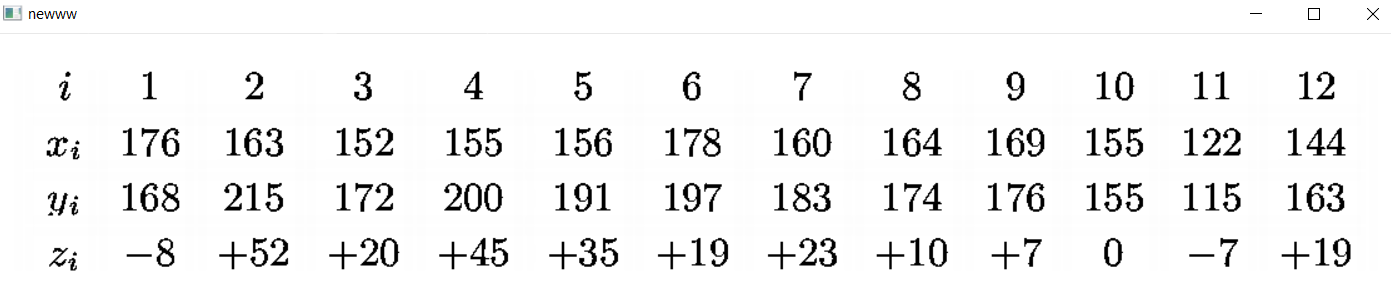